**Import the required libraries:**

In [42]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer


In [43]:
# Download NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\Rajat
[nltk_data]     Shrivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Rajat
[nltk_data]     Shrivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rajat
[nltk_data]     Shrivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Rajat
[nltk_data]     Shrivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Rajat
[nltk_data]     Shrivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Us

True

In [44]:
df1=pd.read_csv("../data/1429_1.csv")
df2=pd.read_csv("../data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
df3=pd.read_csv("../data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")


C:\Users\Rajat Shrivastava\AppData\Local\Temp\ipykernel_11688\3218589047.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("1429_1.csv")


In [45]:
df = pd.concat([df1, df2, df3], ignore_index=True)

print(df.columns)
print(df.head())

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username', 'dateAdded', 'dateUpdated',
       'primaryCategories', 'imageURLs', 'manufacturerNumber', 'sourceURLs'],
      dtype='object')
                     id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins  

In [46]:
df=df[["reviews.text","reviews.rating"]].dropna()
clean_df = df.drop_duplicates(subset='reviews.text', keep='first')

In [47]:
def label_sentiment(rating):
    if rating <= 2:
        return "negative"
    elif rating == 3:
        return "neutral"
    else:
        return "positive"

clean_df['sentiment'] = clean_df['reviews.rating'].apply(label_sentiment)




C:\Users\Rajat Shrivastava\AppData\Local\Temp\ipykernel_11688\615381785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['sentiment'] = clean_df['reviews.rating'].apply(label_sentiment)


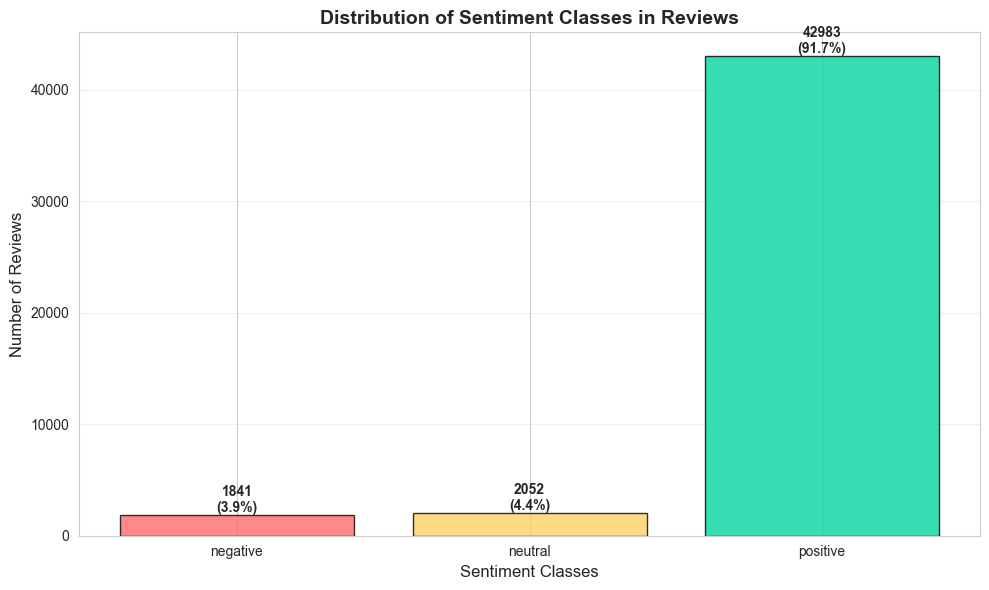


SENTIMENT DISTRIBUTION ANALYSIS
Total reviews: 46,876

Detailed breakdown:
negative:  1,841 reviews (  3.9%)
neutral :  2,052 reviews (  4.4%)
positive: 42,983 reviews ( 91.7%)

Original rating distribution:
Rating 1 (negative):  1,069 reviews (  2.3%)
Rating 2 (negative):    772 reviews (  1.6%)
Rating 3 (neutral ):  2,052 reviews (  4.4%)
Rating 4 (positive): 10,273 reviews ( 21.9%)
Rating 5 (positive): 32,710 reviews ( 69.8%)


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def checkDataDistribution(df):
    # Count occurrences of each class
    class_counts = df['sentiment'].value_counts()
    class_counts = class_counts.reindex(['negative', 'neutral', 'positive'], fill_value=0)

    # Create histogram
    plt.figure(figsize=(10, 6))
    colors = ['#ff6b6b', '#ffd166', '#06d6a0']  # red, yellow, green
    bars = plt.bar(class_counts.index, class_counts.values, color=colors, alpha=0.8, edgecolor='black')


    # Add count labels on bars
    for bar, count in zip(bars, class_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                 f'{count}\n({count/len(df)*100:.1f}%)',
                 ha='center', va='bottom', fontweight='bold')
    plt.title('Distribution of Sentiment Classes in Reviews', fontsize=14, fontweight='bold')
    plt.xlabel('Sentiment Classes', fontsize=12)
    plt.ylabel('Number of Reviews', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Print detailed statistics
    print("\n" + "="*50)
    print("SENTIMENT DISTRIBUTION ANALYSIS")
    print("="*50)
    print(f"Total reviews: {len(df):,}") # Corrected len(df) to len(df_fewcolumns)
    print("\nDetailed breakdown:")
    for cls in ['negative', 'neutral', 'positive']:
        count = class_counts.get(cls, 0) # Use .get() for robustness
        percentage = (count / len(df)) * 100 # Corrected len(df) to len(df_fewcolumns)
        print(f"{cls:8}: {count:>6,} reviews ({percentage:5.1f}%)")

    print("\nOriginal rating distribution:")
    rating_counts = df['reviews.rating'].value_counts() # Corrected syntax and df variable
    for rating in range(1, 6):
        count = rating_counts.get(rating, 0) # Use .get() for robustness
        percentage = (count / len(df)) * 100 # Corrected len(df) to len(df_fewcolumns)
        sentiment = label_sentiment(rating)
        print(f"Rating {rating} ({sentiment:8}): {count:>6,} reviews ({percentage:5.1f}%)")


checkDataDistribution(clean_df)


In [49]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Rajat
[nltk_data]     Shrivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [50]:
# --- Step 1: Identify minority class ---

import nlpaug.augmenter.word as naw
import random

nltk.download('wordnet')
nltk.download('omw-1.4')

def dataAgumentation(df,minority_class):
    minority_class = minority_class
    minority_df = df[df['sentiment'] == minority_class]

    # --- Step 2: Define augmentation functions ---
    syn_aug = naw.SynonymAug(aug_src='wordnet')  # synonym replacement

    def random_deletion(text, p=0.2):
        words = text.split()
        if len(words) == 1:
            return text
        remaining = [word for word in words if random.random() > p]
        if len(remaining) == 0:
            return random.choice(words)
        return ' '.join(remaining)

    # --- Step 3: Augment minority class ---
    augmented_texts = []
    augmented_labels = []

    for review in minority_df['reviews.rating'].dropna().astype(str):
        # Apply synonym replacement
        augmented_texts.append(syn_aug.augment(review))
        augmented_labels.append(minority_class)

        # Apply random deletion
        augmented_texts.append(random_deletion(review))
        augmented_labels.append(minority_class)

    # --- Step 4: Combine original + augmented data ---
    augmented_df = pd.DataFrame({'reviews.rating': augmented_texts, 'sentiment': augmented_labels})
    df_balanced = pd.concat([df, augmented_df]).reset_index(drop=True)

    print("Original class counts:\n", df['sentiment'].value_counts())
    print("\nAfter augmentation:\n", df_balanced['sentiment'].value_counts())
    return df_balanced


[nltk_data] Downloading package wordnet to C:\Users\Rajat
[nltk_data]     Shrivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Rajat
[nltk_data]     Shrivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [51]:
df_balanced=dataAgumentation(clean_df,"negative")
df_balanced=dataAgumentation(df_balanced,"neutral")

Original class counts:
 sentiment
positive    42983
neutral      2052
negative     1841
Name: count, dtype: int64

After augmentation:
 sentiment
positive    42983
negative     5523
neutral      2052
Name: count, dtype: int64
Original class counts:
 sentiment
positive    42983
negative     5523
neutral      2052
Name: count, dtype: int64

After augmentation:
 sentiment
positive    42983
neutral      6156
negative     5523
Name: count, dtype: int64


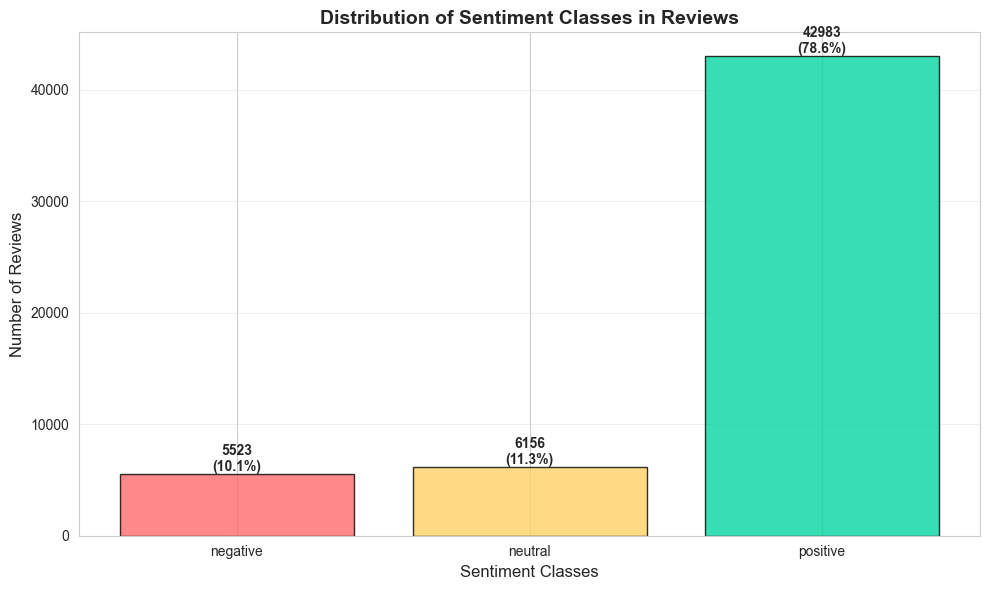


SENTIMENT DISTRIBUTION ANALYSIS
Total reviews: 54,662

Detailed breakdown:
negative:  5,523 reviews ( 10.1%)
neutral :  6,156 reviews ( 11.3%)
positive: 42,983 reviews ( 78.6%)

Original rating distribution:
Rating 1 (negative): 10,273 reviews ( 18.8%)
Rating 2 (negative):  2,052 reviews (  3.8%)
Rating 3 (neutral ):  2,052 reviews (  3.8%)
Rating 4 (positive):  1,069 reviews (  2.0%)
Rating 5 (positive):  1,069 reviews (  2.0%)


C:\Users\Rajat Shrivastava\AppData\Local\Temp\ipykernel_11688\246351748.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = rating_counts.get(rating, 0) # Use .get() for robustness


In [52]:
checkDataDistribution(df_balanced)

In [72]:
label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
df_balanced['label'] = df_balanced['sentiment'].map(label_map)
data_train=df_balanced["reviews.text"].str.lower()
data_test=df_balanced["label"]

In [55]:
def tokenize_text(text):
    if isinstance(text, str):

        return word_tokenize(text)   # returns a list of tokens
    else:
        return []
data_token=data_train.apply(tokenize_text)

**Remove stop words**

In [56]:
def remove_stop_words(text):

        stop_words = set(stopwords.words('english'))
        words_clean = [word for word in text if word not in stop_words]

        return ' '.join(words_clean)

filter_data=data_token.apply(remove_stop_words)

print(filter_data.head())

0    product far disappointed . children love use l...
1    great beginner experienced person . bought gif...
2    inexpensive tablet use learn , step nabi . thr...
3    've fire hd 8 two weeks love . tablet great va...
4    bought grand daughter comes visit . set user ,...
Name: reviews.text, dtype: object


In [57]:
import re

def clean_text(text):                          # lowercase
    text = re.sub(r'[^a-z\s]', '', text)           # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()       # remove extra spaces
    return text
filter_data=filter_data.apply(clean_text)

**Split the data for train and test**

In [74]:
from sklearn.model_selection import train_test_split

X=filter_data
y=data_test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,   stratify=y
)

print(X_train.shape)
print(y_train.shape)



(43729,)
(43729,)


**Load the vectorizer and vectorize the data**

In [75]:
X_train_str = X_train.apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
X_test_str  = X_test.apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

tfidf = TfidfVectorizer(
     max_features=5000,
    analyzer='char', ngram_range=(1,5)
)
X_train_tfidf = tfidf.fit_transform(X_train_str)
X_val_tfidf = tfidf.transform(X_test_str)


In [60]:
print(X_val_tfidf.shape)
print(X_train_tfidf.shape)

(10933, 5000)
(43729, 5000)


**Initialize the model and train the model**

In [ ]:
# from sklearn.linear_model import  LogisticRegression

# model = LogisticRegression(max_iter=500)

# model.fit(X_train_tfidf, y_train)

In [37]:
from xgboost import XGBClassifier

model = XGBClassifier(num_class=5, objective='multi:softmax',
                      n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
)

model.fit(X_train_tfidf, y_train)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [61]:
# from sklearn.svm import SVC
# model = SVC(kernel='linear', class_weight='balanced')
# model.fit(X_train_tfidf, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [64]:
import joblib

joblib.dump(model, '../sentiment_model_xgboost.pkl')

['sentiment_model_logistic.pkl']

In [69]:
import joblib
model = joblib.load('../sentiment_model_xgboost.pkl')

**Create prediction with validation data**

In [70]:
y_pred = model.predict(X_val_tfidf)

**Calculate accuracy score based on prediction**

In [73]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.0


ValueError: Mix of label input types (string and number)

**Confusion matrix based on test and prediction**

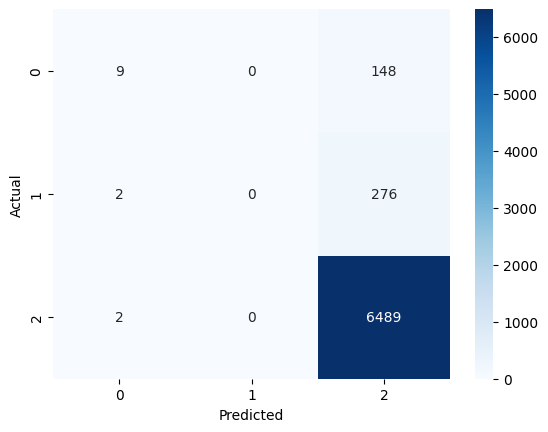

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Test the model with load the test data**

In [ ]:
test_data=pd.read_csv("/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
test_data=test_data[["reviews.text"]].dropna()

**Prepocess the test data**

In [ ]:
test_data.columns

In [ ]:
test_data["reviews.text"].apply(tokenize_text)
test_data["reviews.text"].apply(remove_stop_words,stopwords)
test_data_str  = test_data["reviews.text"].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
tfidf_test_data=tfidf.transform(test_data_str)

Validate

In [ ]:
# y_pred = model.predict(tfidf_test_data)
# test_data["sentiment"]=y_pred
# test_data.to_csv("result/testing_data_predictions.csv", index=False)